# Machine à laver le linge

Le fichier {download}`data/machine_a_laver.wav` contient le bruit d'une machine à laver le linge lors de l'essorage. Quelle est la fréquence de rotation du tambour ? 

--------------------------------------------------------------------------------------

## Solution

In [6]:
from scipy.io.wavfile import read
from numpy.fft import rfft, rfftfreq
from matplotlib.pyplot import figure
import numpy as np

In [7]:
samplerate, amplitude = read('data/machine_a_laver.wav')

In [8]:
print(samplerate)
delta_t = 1/samplerate
N = len(amplitude)
print(N)
T = N*delta_t
print(T)

44100
414380
9.396371882086168


In [9]:
amplitude_tilde = rfft(amplitude)
freq = rfftfreq(N, delta_t)

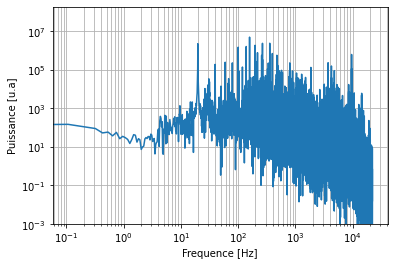

In [10]:
fig = figure()
ax = fig.subplots(1, 1)

ax.loglog(freq, np.abs(amplitude_tilde)**2)
ax.set_ylim(1E-3, None)

ax.set_xlabel('Frequence [Hz]')
ax.set_ylabel('Puissance [u.a]')

ax.grid(which='both')

La fréquence typique de rotation est de 1200 tours par minutes, soit environ 20 Hz. Il s'agir du pic de gauche. On zoom dessus.

Text(0, 0.5, 'Puissance [u.a]')

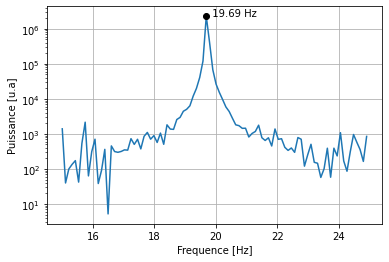

In [11]:
mask = np.abs(freq-20)<5

fig = figure()
ax = fig.subplots(1, 1)

ax.semilogy(freq[mask], np.abs(amplitude_tilde[mask])**2)
ax.grid()

i = np.argmax(np.abs(amplitude_tilde[mask])**2)
freq_max = freq[mask][i]
amp_max = np.abs(amplitude_tilde[mask][i])**2

ax.semilogy(freq_max, amp_max, 'ko')
ax.text(freq_max, amp_max, f'  {freq_max:.2f} Hz')

ax.set_xlabel('Frequence [Hz]')
ax.set_ylabel('Puissance [u.a]')